***
# <font color=green size=10>Trabalho 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Com base no que foi estudado, realize uma análise descritiva básica de um conjunto de dados selecionado por você.


# <font color=green>DATASET DO PROJETO</font>
***

### Sobre o Dataset
 
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas. Foi criado para entender a influência de fatores como a formação dos pais, preparação para o teste e alimentação, no desempenho dos alunos.

### Fonte dos Dados
https://www.kaggle.com/spscientist/students-performance-in-exams

### Variáveis utilizadas

> ### Gender
> ***

Gênero dos estudantes analisados.

> ### Parental level of education
> ***

Nível de escolaridade de seus pais. 

> ### math score
> ***

Nota do aluno no teste de matemática.

> ### reading score
> ***

Nota do aluno no teste de leitura e interpretação.

> ### writing score
> ***

Nota do aluno no teste de escrita.

> ### lunch
> ***

Tipo de almoço disponível para o aluno.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. As entradas com valores "Outliers" nas variáveis quantitativas foram removidas. 


***
***

### Importar Bibliotecas






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dadosSP = pd.read_csv('StudentsPerformance.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dadosSP.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group E,bachelor's degree,standard,none,100,100,100
1,male,group E,bachelor's degree,standard,completed,100,100,100
2,female,group E,associate's degree,standard,none,100,100,100
3,female,group E,bachelor's degree,standard,completed,99,100,100
4,female,group D,some high school,standard,completed,97,100,100


### Para avaliarmos o comportamento da variável math score vamos construir uma tabela de frequências considerando as seguintes classes de notas:
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>
 
Classes de notas:
 
<b>A</b> ► Acima de 79
 
<b>B</b> ► De 66 a 79 
 
<b>C</b> ► De 53 a 66 
 
<b>D</b> ► De 40 a 53 
 
<b>E</b> ► Até 40
 
 
#### Siga os passos abaixo:

### 1º Definir os intevalos das classes

---



In [ ]:
dadosSP.math_score.min()

27

In [ ]:
dadosSP.math_score.max()

100

In [ ]:
classes = [0, 40, 53, 66, 79, 100]

### 2º Definir os labels das classes

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
pd.cut(x=dadosSP.math_score,
       bins = classes,
       labels= labels,
       include_lowest = True)

0      A
1      A
2      A
3      A
4      A
      ..
981    E
982    D
983    E
984    E
985    D
Name: math_score, Length: 986, dtype: category
Categories (5, object): [E < D < C < B < A]

In [ ]:
frequencia = pd.value_counts(pd.cut(x=dadosSP.math_score,
       bins = classes,
       labels= labels,
       include_lowest = True))

frequencia

C    487
D    211
B    171
A    103
E     14
Name: math_score, dtype: int64

In [ ]:
dist_freq_qualitativas_personalizadas = pd.DataFrame(
    {'Frequencia': frequencia})

dist_freq_qualitativas_personalizadas


,Frequencia
C,487
D,211
B,171
A,103
E,14


### 4º Construir a coluna de percentuais

In [ ]:
percentual = pd.value_counts(pd.cut(x=dadosSP.math_score,
       bins = classes,
       labels= labels,
       include_lowest = True),
       normalize = True)
percentual

C    0.493915
D    0.213996
B    0.173428
A    0.104462
E    0.014199
Name: math_score, dtype: float64

In [ ]:
dist_freq_qualitativas_personalizadas = pd.DataFrame(
    {'Porcentagem (%)': percentual})

dist_freq_qualitativas_personalizadas

,Porcentagem (%)
C,0.493915
D,0.213996
B,0.173428
A,0.104462
E,0.014199


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dist_freq_qualitativas_personalizadas = pd.DataFrame(
    {'Frequencia': frequencia , 'Porcentagem (%)': percentual})

dist_freq_qualitativas_personalizadas.sort_index(ascending=False)

,Frequencia,Porcentagem (%)
A,103,0.104462
B,171,0.173428
C,487,0.493915
D,211,0.213996
E,14,0.014199


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

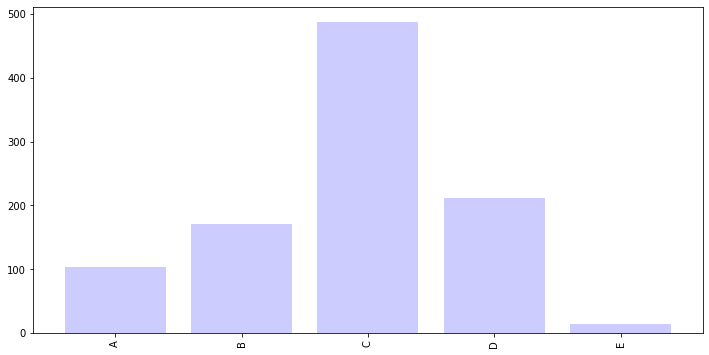

In [ ]:
dist_freq_qualitativas_personalizadas['Frequencia'].sort_index(ascending=False).plot.bar(width=0.8, color='blue', alpha=0.2, figsize=(12,6))

### Fazendo a distribuição a partir da regra de Sturges (classes de amplitude fixa)

### 1º Definir o número de classes com a regra de sturges

In [ ]:
n = dadosSP.shape[0] 
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

11

### 2º Construir a tabela de frequências

In [ ]:
frequencia = pd.value_counts(
    pd.cut(
        x=dadosSP.math_score,
        bins = 11,
        include_lowest = True
    ),
    sort = False
)
frequencia

(26.926, 33.636]      8
(33.636, 40.273]     28
(40.273, 46.909]     46
(46.909, 53.545]    107
(53.545, 60.182]    136
(60.182, 66.818]    168
(66.818, 73.455]    173
(73.455, 80.091]    144
(80.091, 86.727]     81
(86.727, 93.364]     64
(93.364, 100.0]      31
Name: math_score, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(
        x=dadosSP.math_score,
        bins = 11,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

(26.926, 33.636]    0.008114
(33.636, 40.273]    0.028398
(40.273, 46.909]    0.046653
(46.909, 53.545]    0.108519
(53.545, 60.182]    0.137931
(60.182, 66.818]    0.170385
(66.818, 73.455]    0.175456
(73.455, 80.091]    0.146045
(80.091, 86.727]    0.082150
(86.727, 93.364]    0.064909
(93.364, 100.0]     0.031440
Name: math_score, dtype: float64

In [ ]:
dist_freq_quanatitativas_amplitude_fixa = pd.DataFrame(
    {'Frequencia': frequencia , 'Porcentagem (%)': percentual})

dist_freq_quanatitativas_amplitude_fixa

,Frequencia,Porcentagem (%)
"(26.926, 33.636]",8,0.008114
"(33.636, 40.273]",28,0.028398
"(40.273, 46.909]",46,0.046653
"(46.909, 53.545]",107,0.108519
"(53.545, 60.182]",136,0.137931
"(60.182, 66.818]",168,0.170385
"(66.818, 73.455]",173,0.175456
"(73.455, 80.091]",144,0.146045
"(80.091, 86.727]",81,0.082150
"(86.727, 93.364]",64,0.064909


### Gráfico de barras

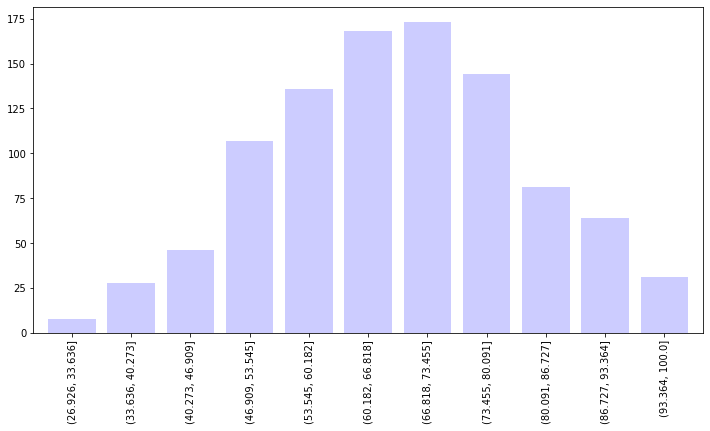

In [ ]:
dist_freq_quanatitativas_amplitude_fixa['Frequencia'].plot.bar(width=0.8, color='blue', alpha=0.2, figsize=(12,6))

> ### Conclusões
 
Analisando a distribuição de frequências e os gráficos da variável math_score, é possível verificar as características de uma distribuição normal, com poucos valores concentrados nas extremidades, o que significa que as notas dos alunos tendem a estar mais próximos da média do que valores mais altos e mais baixos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

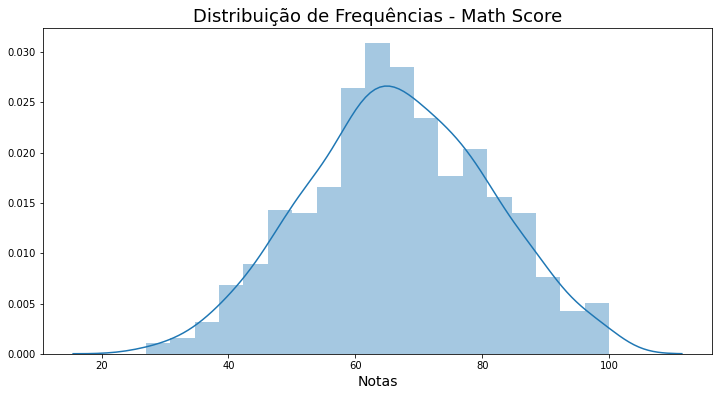

In [ ]:
ax = sns.distplot(dadosSP.math_score)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Math Score', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax

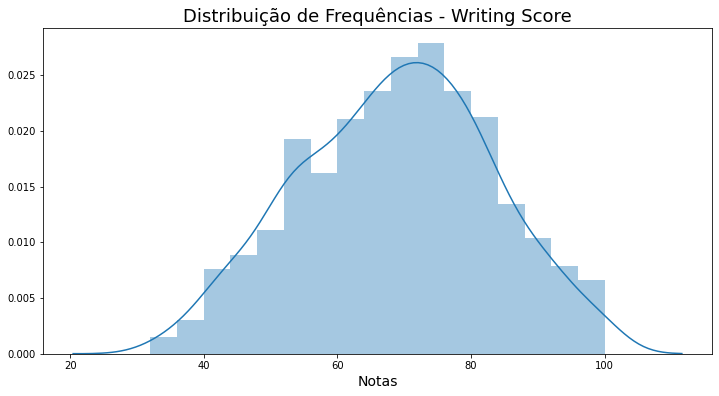

In [ ]:
ax = sns.distplot(dadosSP.writing_score)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Writing Score', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax

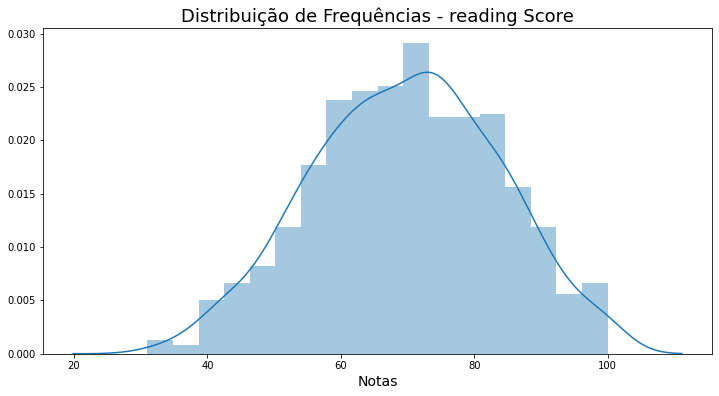

In [ ]:
ax = sns.distplot(dadosSP.reading_score)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - reading Score', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax

> ### Conclusões
 
As notas de escrita, leitura e de matemática apresentam simetria considerável, sendo que a maioria das notas nas 3 disciplinas estão em torno de 60 à 80 pontos e configurando distribuições normais de uma forma geral. 
 
A performance por estudante em matemática parece ser  menor que as outras duas disciplinas, sendo leitura a disciplina com melhores resultados, isso pode ser causado pela dificuldade normalmente atribuída por estudantes às disciplinas da área de exatas, como física e matemática.

### Para a variável Math Score, construa um histograma somente com as informações das pessoas com um resultado de até 80 pontos

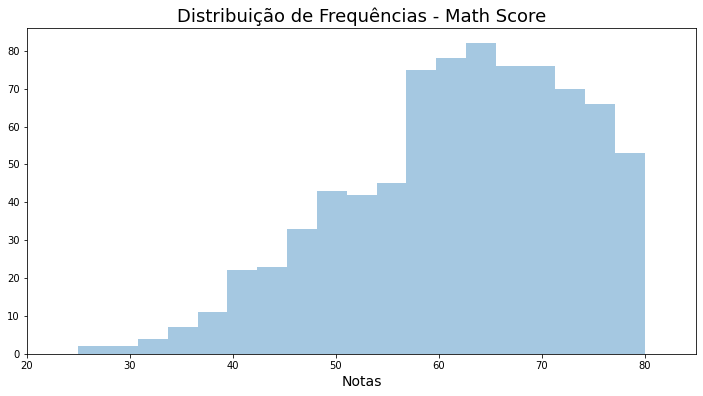

In [ ]:
ax = sns.distplot(dadosSP.math_score, kde=False, hist=True, hist_kws={"range": [25,80]})
ax.set_xlim(20, 85)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Math Score', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais cruzando as variáveis lunch e gender
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>

In [ ]:
pd.crosstab(index=dadosSP.gender, columns=dadosSP.lunch, rownames=['Gênero'], 
            colnames=['Almoço']).apply(lambda lunch: (lunch/lunch.sum()) * 100, axis=1)

Almoço,free/reduced,standard
Gênero,,
female,35.756385,64.243615
male,33.962264,66.037736


In [ ]:
pd.crosstab(index=dadosSP.gender, columns=dadosSP.lunch, rownames=['Gênero'], colnames=['Almoço'])

Almoço,free/reduced,standard
Gênero,,
female,182,327
male,162,315


> ### Conclusões
 
Analisando os dados apresentados na tabela, é possível verificar uma pequena diferença na qualidade da alimentação, onde os homens têm mais acesso ao almoço completo do que as mulheres, embora essa diferença seja muito pequena para assumirmos que existe uma relação forte entre as variáveis.

# Realize, para a variável Math Score, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento



### Obtenha a média aritimética

In [ ]:
dadosSP.math_score.mean()

66.6947261663286

### Obtenha a mediana

In [ ]:
dadosSP.math_score.median()

66.5

### Obtenha a moda

In [ ]:
dadosSP.math_score.mode()

0    65
dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dadosSP.math_score.mad()

11.585192697768708

### Obtenha a variância

In [ ]:
dadosSP.math_score.var()

205.65798231072583

### Obtenha o desvio-padrão

In [ ]:
dadosSP.math_score.std()

14.340780394062445

> ### Conclusões
 
A proximidade dos valores da média, mediana e moda indicam uma forte simetria, (o que já verificamos a partir distribuição de frequências com os gráficos acima), com os outros 3 resultados podemos verificar que a variação em torno da média não é muito alta considerando a amplitude de possibilidade dos resultados.

### Obtenha a média, mediana e valor máximo da variável math_score segundo gender e parental level of education
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
pd.crosstab(index=dadosSP.gender, columns=dadosSP.parental_level_of_education, rownames=['Gênero'], colnames=['Nivel de Escolaridade dos pais'], 
            values=dadosSP.math_score, aggfunc={'median','mean','max'})

max  ...           median
Nivel de Educação dos pais associate's degree  ... some high school
Gênero                                         ...                 
female                                  100.0  ...             63.5
male                                    100.0  ...             68.0

[2 rows x 18 columns]

> ### Conclusões
 
Analisando a tabela, vemos que de uma forma geral os resultados dos homens na avaliação de matemática tendem a ser melhores que o das mulheres, independente do nível de escolaridade de seus pais, porém, o nível de escolaridade dos pais parece ter um impacto mesmo que pequeno nas notas dos alunos (quanto maior o nível, melhores as notas).

### Obtenha as medidas de dispersão da variável math_score segundo gender e lunch
#### <font color='blue'>Destaque os pontos mais importantes que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
pd.crosstab(index=dadosSP.gender, columns=dadosSP.lunch, rownames=['Gêneros'], colnames=['Almoço'], 
            values=dadosSP.math_score, aggfunc={'mad', 'var', 'std'})

mad             ...          var            
Almoço  free/reduced   standard  ... free/reduced    standard
Gêneros                          ...                         
female     11.351648  10.574026  ...   186.220873  174.405246
male       10.742341  10.853051  ...   177.728433  175.189101

[2 rows x 6 columns]

> ### Conclusões
 
De acordo com a tabela, a dispersão em torno da média dos alunos não é muito afetada pelo tipo de almoço, principalmente entre os homens, sendo a diferença um pouco maior no caso das mulheres. A diferença entre os gêneros não é grande o bastante para assumirmos que existe uma relação direta.

### Construa um box plot da variável Math Score segundo Gênero e Nível de escolaridade dos pais 
#### <font color='blue'>É possível verificar algum comportamento diferenciado nas notas das pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com nota acima de 85</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

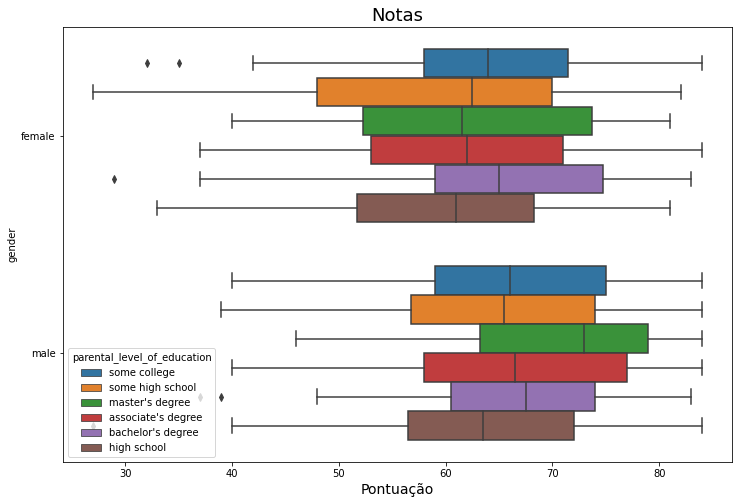

In [ ]:
ax = sns.boxplot(x='math_score', y='gender', hue='parental_level_of_education', data = dadosSP.query('math_score < 85'), orient='h') 
ax.figure.set_size_inches(12,8)
ax.set_title('Notas', fontsize=18)
ax.set_xlabel('Pontuação', fontsize=14)
ax

> ### Conclusões

De uma forma geral, os homens apresentam maior simetria entre seus resultados que as mulheres, porém, o nível de escolaridade dos pais afeta consideravelmente a simetria das notas, sendo que um nivél mais baixo tende a resultar em alunos com notas menores.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> que tem valores de notas de escrita fracos a partir do 50?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats
stats.percentileofscore(dadosSP.writing_score, score=50, kind='weak')  # 11,16% dos valores estão abaixo da média

11.156186612576064

### Qual o valor máximo alcançado por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
from scipy import stats
dadosSP.quantile([0.25,0.5,0.75,1])

,math_score,reading_score,writing_score
0.25,57.0,60.0,58.0
0.50,66.5,70.0,69.0
0.75,77.0,80.0,79.0
1.00,100.0,100.0,100.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável writing_score segundo gender e parental_level_of_education
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
pd.crosstab(index=dadosSP.gender, columns=dadosSP.parental_level_of_education, rownames=['Gêneros'], colnames=['Nível de Educação'], 
            values=dadosSP.writing_score, aggfunc={'mean', 'median', 'max', 'std'})

max  ...              std
Nível de Educação associate's degree  ... some high school
Gêneros                               ...                 
female                         100.0  ...        14.761563
male                            95.0  ...        12.970635

[2 rows x 24 columns]

### Construa um box plot da variável reading_score segundo gender
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com notas abaixo de 85</font>
#### <font color='red'>2º - Utilize a variável parental level of education para identificar se a desigualdade se verifica para pessoas cujos pais possuem mesma escolaridade.
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

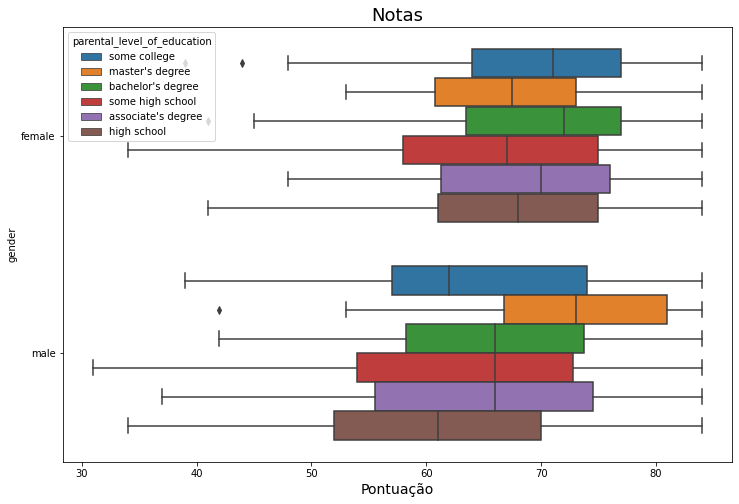

In [ ]:
ax = sns.boxplot(x='reading_score', y='gender', hue='parental_level_of_education', data = dadosSP.query('reading_score < 85'), orient='h') 
ax.figure.set_size_inches(12,8)
ax.set_title('Notas', fontsize=18)
ax.set_xlabel('Pontuação', fontsize=14)
ax

> ### Conclusões
 
Os homens tendem a ter notas mais assimétricas do que as das mulheres de acordo com o nivel de escolaridade dos pais.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável math_score segundo as reading_score
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dadosSP.groupby(['reading_score']).agg({'math_score': ['mean','median', 'max', 'std']})

math_score                       
                    mean median  max        std
reading_score                                  
31             51.000000   51.0   51        NaN
34             33.000000   29.5   46   8.981462
37             48.333333   47.0   53   4.163332
39             41.400000   41.0   53   7.569676
40             29.000000   29.0   29        NaN
...                  ...    ...  ...        ...
95             86.875000   87.5   91   3.044316
96             94.500000   93.5  100   4.358899
97             87.400000   82.0  100  10.358571
99             90.000000   88.0   94   3.464102
100            94.529412   93.0  100   4.570526

[64 rows x 4 columns]

### Construa um box plot da variável writing_score segundo as race/ethnicity
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

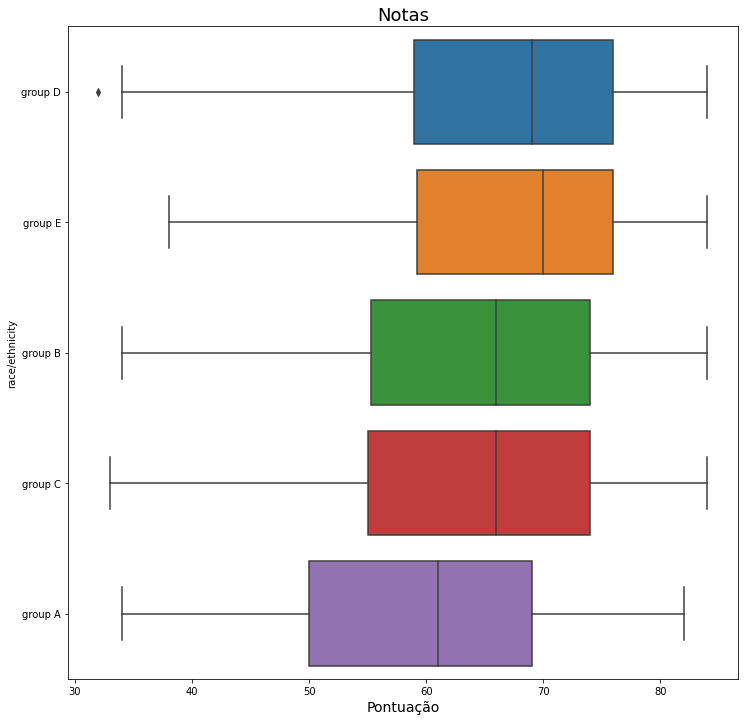

In [ ]:
ax = sns.boxplot(x='writing_score', y='race/ethnicity', data = dadosSP.query('writing_score < 85'), orient='h') 
ax.figure.set_size_inches(12,12)
ax.set_title('Notas', fontsize=18)
ax.set_xlabel('Pontuação', fontsize=14)
ax

> ### Conclusões

Analisando os gráficos box-plot, as notas de escrita estão simétricas em relação aos grupos race/ethnicity.